# Comparing Campaigns

We went into a deep dive into a single campaign, but let's see how the campaigns stack up against each other. For plots in this page, let's try out Seaborn.

In [469]:
%run ../../src/config.py
%run ../../src/read_data.py
%run ../../src/build_data.py

In [312]:
import math
import numpy as np
import pandas as pd
import matplotlib.patches as ptch
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import seaborn.objects as so

def_max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', 200)
sns.set_theme(rc = {'figure.figsize': (16, 10)})

relative_data_dir = f'../../{data_dir}'
relative_db_file = f'{relative_data_dir}/{db_file}'

campaign_db = BuildCampaignDatabase(
    GetTranscriptDatabase(relative_db_file),
    drop_cols       = ['link', 'download_date'],
    remove_episodes = episodes_to_remove
)
campaign_db

,campaign_no,arc_no,episode_no,campaign,arc,episode,transcript_file,episode_index,episode_label
0,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival at Kraghammer,section001/subsection001/episode001.csv,1.0,1-1-01
1,1,1,2,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Into the Greyspine Mines,section001/subsection001/episode002.csv,2.0,1-1-02
2,1,1,3,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Strange Bedfellows,section001/subsection001/episode003.csv,3.0,1-1-03
3,1,1,4,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Attack on the Duergar Warcamp,section001/subsection001/episode004.csv,4.0,1-1-04
4,1,1,5,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,The Trick about Falling,section001/subsection001/episode005.csv,5.0,1-1-05
...,...,...,...,...,...,...,...,...,...
349,3,4,19,Campaign Three: Bells Hells,Campaign Three Arc 4,Where The Red Fearne Glows,section003/subsection004/episode019.csv,349.0,3-4-19
350,3,4,20,Campaign Three: Bells Hells,Campaign Three Arc 4,Gathering of Needs,section003/subsection004/episode020.csv,350.0,3-4-20
351,3,4,21,Campaign Three: Bells Hells,Campaign Three Arc 4,Shadows New and Old,section003/subsection004/episode021.csv,351.0,3-4-21
352,3,4,22,Campaign Three: Bells Hells,Campaign Three Arc 4,Ancient Sins,section003/subsection004/episode022.csv,352.0,3-4-22


In [313]:
campaigns = campaign_db \
    .groupby(['campaign_no', 'campaign']) \
    .agg({'episode': 'count', 'episode_index': ['min', 'max']}) \
    .reset_index()
campaigns.columns = ["_".join(col_name).rstrip('_') for col_name in campaigns.columns.to_flat_index()]
campaigns

,campaign_no,campaign,episode_count,episode_index_min,episode_index_max
0,1,Campaign 1: Vox Machina,114,1.0,114.0
1,2,Campaign 2: The Mighty Nein,141,115.0,255.0
2,3,Campaign Three: Bells Hells,98,256.0,353.0


In [314]:
campaign_arcs = campaign_db \
    .groupby(['campaign_no', 'campaign', 'arc_no', 'arc']) \
    .agg({'episode': 'count', 'episode_index': ['min', 'max']}) \
    .reset_index()
campaign_arcs.columns = ["_".join(col_name).rstrip('_') for col_name in campaign_arcs.columns.to_flat_index()]
campaign_arcs

,campaign_no,campaign,arc_no,arc,episode_count,episode_index_min,episode_index_max
0,1,Campaign 1: Vox Machina,1,Arc 1: Kraghammer and Vasselheim,22,1.0,22.0
1,1,Campaign 1: Vox Machina,2,Arc 2: The Briarwoods,15,23.0,37.0
2,1,Campaign 1: Vox Machina,3,Arc 3: The Chroma Conclave,46,38.0,83.0
3,1,Campaign 1: Vox Machina,4,Arc 4: Taryon Darrington,15,84.0,98.0
4,1,Campaign 1: Vox Machina,5,Arc 5: Vecna,16,99.0,114.0
5,2,Campaign 2: The Mighty Nein,1,Arc 1: Come Together,35,115.0,149.0
6,2,Campaign 2: The Mighty Nein,2,Arc 2: The Bad Guys,12,150.0,161.0
7,2,Campaign 2: The Mighty Nein,3,Arc 3: The Bright Queen's Favor,22,162.0,183.0
8,2,Campaign 2: The Mighty Nein,4,Arc 4: Swords and Angels,22,184.0,205.0
9,2,Campaign 2: The Mighty Nein,5,Arc 5: Family Ties,21,206.0,226.0


## Comparing episode counts

First, let's just look at the number of episodes in each arc.

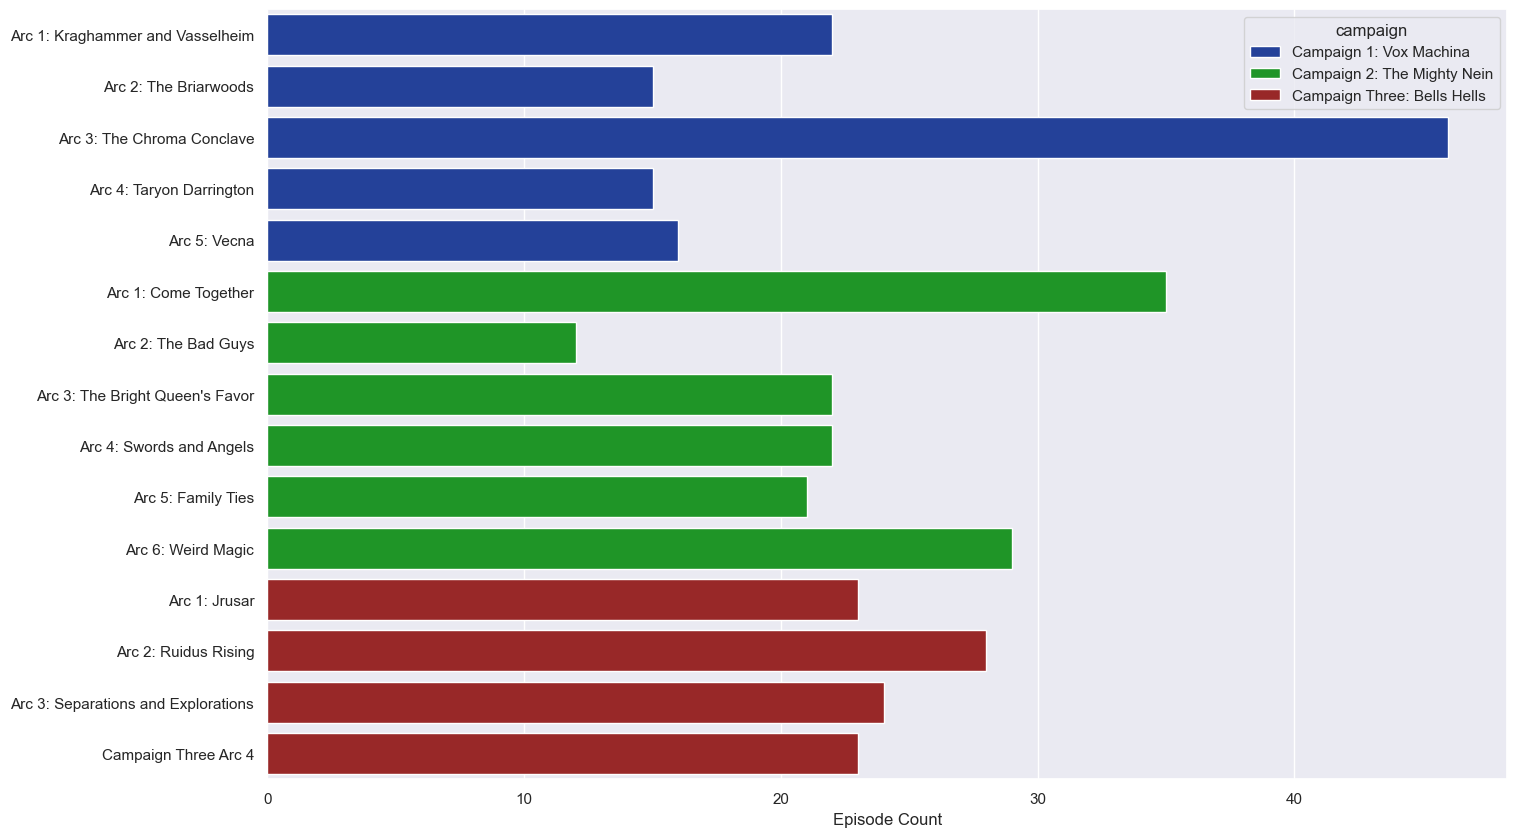

In [288]:
ax = sns.barplot(
    data   = campaign_arcs,
    y      = 'arc',
    x      = 'episode_count',
    hue    = 'campaign',
    orient = 'h',
    palette = campaign_colors['color']
)
ax.set(xlabel = 'Episode Count', ylabel = '')
plt.show()

Here we clearly see that The Chroma Conclave is the longest arc. Also, it seems like they have gotten more consistent in breaking up their arcs into a length of 20-30 episodes.

## Episode Transcripts

First, let's get all the transcript data. We only want 'Part I' and 'Part II' to focus only on the actual play.

In [96]:
transcripts = CollectTranscripts(
    campaign_db,
    relative_data_dir,
    {'campaign_no': 'campaign_no', 'arc_no': 'arc_no', 'episode_no': 'episode_no',
     'campaign': 'campaign', 'arc': 'arc', 'episode': 'episode'}
)

transcripts = transcripts.loc[transcripts['section'].isin(['Part I', 'Part II']), :].reset_index()
transcripts

,index,campaign_no,arc_no,episode_no,campaign,arc,episode,section_no,line_no,section,speaker,line,linelength,nwords
0,55,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,1,Part I,MATT,All right! Let's jump on in. Thank you. Last w...,1793,320
1,56,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,2,Part I,TRAVIS,Son of a bitch.,15,4
2,57,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,3,Part I,MATT,"Yep, the barbarian for his first and only time...",215,41
3,58,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,4,Part I,TRAVIS,Next time he dies.,18,4
4,59,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,5,Part I,MATT,Yeah. Essentially. Which managed to not turn i...,213,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051901,1104402,3,4,23,Campaign Three: Bells Hells,Campaign Three Arc 4,The_Nox_Engine,4,1163,Part II,MATT,He reaches over to the cracked central dome an...,841,152
1051902,1104403,3,4,23,Campaign Three: Bells Hells,Campaign Three Arc 4,The_Nox_Engine,4,1164,Part II,MATT,[cheering\n[laughter] \n,22,2
1051903,1104404,3,4,23,Campaign Three: Bells Hells,Campaign Three Arc 4,The_Nox_Engine,4,1165,Part II,BRENNAN,Light. [cheering] [clapping] In a space beyond...,957,169
1051904,1104405,3,4,23,Campaign Three: Bells Hells,Campaign Three Arc 4,The_Nox_Engine,4,1166,Part II,MATT,That's it. Thank you all so very much for join...,312,53


## Lines and words per episode

We have a total of over a million lines of dialogue. Let's look at number of lines per episode to see if it has changed over time.

In [193]:
per_episode_summary = transcripts \
    .groupby(['campaign_no', 'campaign', 'arc_no', 'episode_no']) \
    .agg({'line': 'count', 'nwords': 'sum'}) \
    .reset_index() \
    .rename(columns = {'line': 'lines'})
per_episode_summary['unique_id'] = per_episode_summary['campaign_no'].astype(str) + \
    '-' + per_episode_summary['arc_no'].astype(str) + \
    '-' + per_episode_summary['episode_no'].apply('{:02d}'.format)
per_episode_summary

,campaign_no,campaign,arc_no,episode_no,lines,nwords,unique_id
0,1,Campaign 1: Vox Machina,1,1,2129,26020,1-1-01
1,1,Campaign 1: Vox Machina,1,2,2926,26814,1-1-02
2,1,Campaign 1: Vox Machina,1,3,2944,27284,1-1-03
3,1,Campaign 1: Vox Machina,1,4,2263,23954,1-1-04
4,1,Campaign 1: Vox Machina,1,5,3556,28988,1-1-05
...,...,...,...,...,...,...,...
347,3,Campaign Three: Bells Hells,4,19,3215,28131,3-4-19
348,3,Campaign Three: Bells Hells,4,20,3863,35145,3-4-20
349,3,Campaign Three: Bells Hells,4,21,3554,31902,3-4-21
350,3,Campaign Three: Bells Hells,4,22,4218,34038,3-4-22


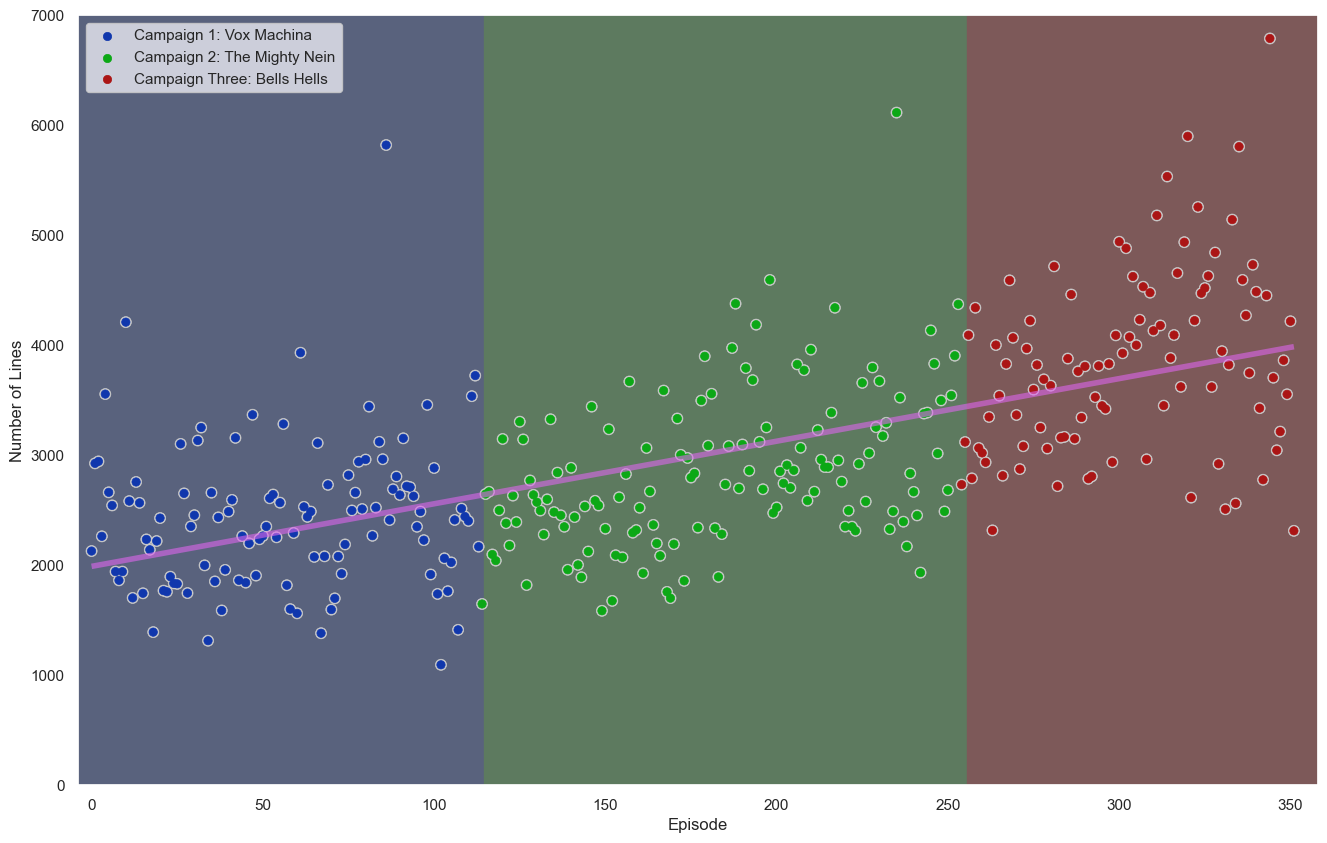

In [324]:
campaign_bounds = campaigns[['campaign_no', 'episode_index_min', 'episode_index_max']] \
    .rename(columns = {'episode_index_min': 'xmin', 'episode_index_max': 'xmax'})
campaign_bounds['xmin'] -= [5, 0.5, 0.5]
campaign_bounds['xmax'] += [0.5, 0.5, 5]
xmin = campaign_bounds['xmin'].min()
xmax = campaign_bounds['xmax'].max()
ymax = math.ceil(per_episode_summary['lines'].max() / 1000) * 1000
p = so.Plot(
    data  = per_episode_summary,
    x     = per_episode_summary.index,
    y     = 'lines',
) \
    .add(so.Dot(color = '#cccccc', pointsize = 8)) \
    .add(so.Dot(), color = 'campaign') \
    .add(so.Line(color = '#dd66ed99'), so.PolyFit(1)) \
    .limit(
        x = (xmin, xmax),
        y = (0, ymax)
    ) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Number of Lines') \
    .scale(color = campaign_colors['color']) \
    .layout(size = (12, 8))

f, ax = plt.subplots()
for i, row in campaign_bounds.iterrows():
    ax.add_patch(ptch.Rectangle(
        xy     = (row['xmin'], 0),
        width  = row['xmax'] - row['xmin'],
        height = ymax,
        color  = campaign_colors['background'][i]
    ))

p.on(ax).plot()

legend = f.legends.pop(0)
ax.legend(legend.legend_handles, [t.get_text() for t in legend.texts])
sns.move_legend(ax, "upper left")

It seems that the average number of lines per episode has just about doubled from when the show started until now. There are a few episodes that stand out as having a lot more lines than the episodes around them. Let's take a look at them.

In [328]:
pd.merge(
    all_episodes,
    per_episode_summary.loc[per_episode_lines['lines'] > 5500, :],
    on = ['campaign_no', 'arc_no', 'episode_no', 'campaign']
)

,campaign_no,campaign,arc_no,arc,episode_no,episode,episode_index,episode_label,lines,nwords,unique_id
0,1,Campaign 1: Vox Machina,4,Arc 4: Taryon Darrington,4,Tangled Depths,87.0,1-4-04,5820,46956,1-4-04
1,2,Campaign 2: The Mighty Nein,6,Arc 6: Weird Magic,11,Fair-weather Faith,237.0,2-6-11,6115,46607,2-6-11
2,3,Campaign Three: Bells Hells,3,Arc 3: Separations and Explorations,10,Crisis of Faith,316.0,3-3-10,5534,43647,3-3-10
3,3,Campaign Three: Bells Hells,3,Arc 3: Separations and Explorations,16,Bloody Flowers,322.0,3-3-16,5900,43345,3-3-16
4,3,Campaign Three: Bells Hells,4,Campaign Three Arc 4,7,Rush for the Bloody Bridge,337.0,3-4-07,5806,43111,3-4-07
5,3,Campaign Three: Bells Hells,4,Campaign Three Arc 4,16,True Heroism,346.0,3-4-16,6789,44841,3-4-16


Campaign 1, arc 4, episode 4 - Tangled Depths - is the episode where Vox Machina go to the Elemental Plane of Water and fight a Kraken and clocks in at 5 and a half hours.

In campaign 2, arc 6, episode 11 - Fair-weather Faith - The Mighty Nein are on their way to Aeor when they encounter and fight Gelidon, an ancient white dragon. This episode also clocks in at nearly 5 and a half hours.

The longest episode of campaign 3, arc 4, episode 16 - True Heroism - is Bell's Hells final fight with Otohan. It clocks in at under 5 hours.

I am noticing that the number of words is similar across these episodes, so it might be interesting to see how the number of words changes over time.

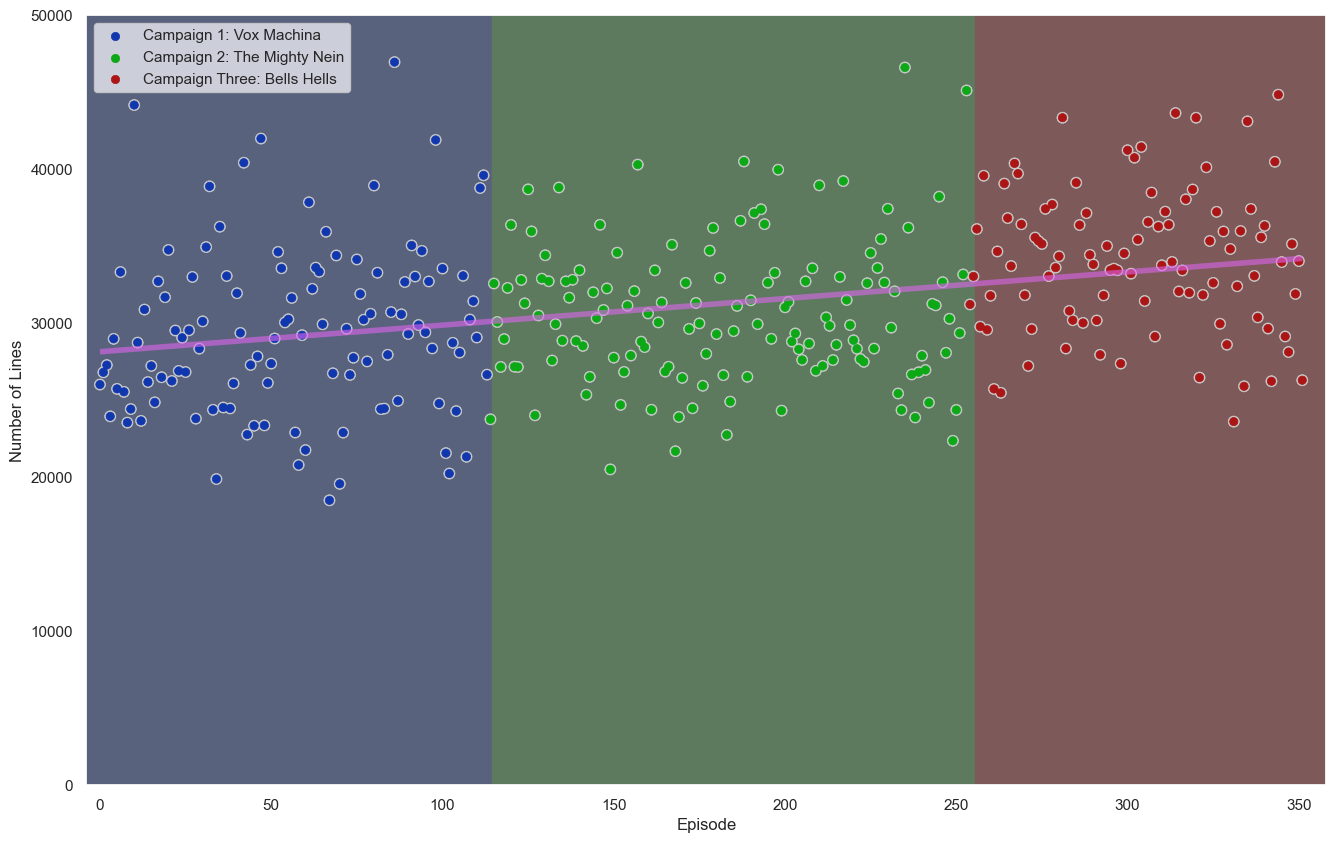

In [329]:
ymax = math.ceil(per_episode_summary['nwords'].max() / 10000) * 10000
p = so.Plot(
    data  = per_episode_summary,
    x     = per_episode_summary.index,
    y     = 'nwords',
) \
    .add(so.Dot(color = '#cccccc', pointsize = 8)) \
    .add(so.Dot(), color = 'campaign') \
    .add(so.Line(color = '#dd66ed99'), so.PolyFit(1)) \
    .limit(
        x = (xmin, xmax),
        y = (0, ymax)
    ) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Number of Lines') \
    .scale(color = campaign_colors['color']) \
    .layout(size = (12, 8))

f, ax = plt.subplots()
for i, row in campaign_bounds.iterrows():
    ax.add_patch(ptch.Rectangle(
        xy     = (row['xmin'], 0),
        width  = row['xmax'] - row['xmin'],
        height = ymax,
        color  = campaign_colors['background'][i]
    ))

p.on(ax).plot()

legend = f.legends.pop(0)
ax.legend(legend.legend_handles, [t.get_text() for t in legend.texts])
sns.move_legend(ax, "upper left")

The number of words does increase but doesn't go up nearly as much as the number of lines, so it must be that the cast is getting more dynamic, or comfortable interrupting, or maybe something else. 

## Proportion of lines per cast number

We can also look at the proportion of the total number of words each cast member takes up, for individual episodes and across episodes.

In [369]:
cast.keys()

dict_keys(['MATT', 'LAURA', 'SAM', 'MARISHA', 'TRAVIS', 'TALIESIN', 'LIAM', 'ASHLEY'])

In [371]:
from pandas.api.types import CategoricalDtype
speaker_cat_type = CategoricalDtype(cast.keys(), ordered = True)
main_cast_transcripts = transcripts[transcripts['speaker'].isin(cast.keys())].reset_index()
main_cast_transcripts['speaker'] = main_cast_transcripts['speaker'].astype(speaker_cat_type)
main_cast_transcripts.sort_values('speaker')

,level_0,index,campaign_no,arc_no,episode_no,campaign,arc,episode,section_no,line_no,section,speaker,line,linelength,nwords
0,0,55,1,1,1,Campaign 1: Vox Machina,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,2,1,Part I,MATT,All right! Let's jump on in. Thank you. Last w...,1793,320
779814,806142,842561,3,2,15,Campaign Three: Bells Hells,Arc 2: Ruidus Rising,A_Dark_Balance,4,1,Part II,MATT,(like Gambit) And welcome back. So you all gat...,148,28
586261,606271,635227,2,6,8,Campaign 2: The Mighty Nein,Arc 6: Weird Magic,Contentious_Company,2,1129,Part I,MATT,"Beauregard, you're up.",22,3
779811,806139,842553,3,2,15,Campaign Three: Bells Hells,Arc 2: Ruidus Rising,A_Dark_Balance,2,1204,Part I,MATT,We'll see y'all in a few minutes.,33,7
376656,393786,414141,2,3,2,Campaign 2: The Mighty Nein,Arc 3: The Bright Queen's Favor,A_Game_of_Names,2,14,Part I,MATT,Yes. She's an elven woman in fine flowing clot...,568,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920607,966615,1010338,3,4,2,Campaign Three: Bells Hells,Campaign Three Arc 4,The_Promise_and_the_Price,4,273,Part II,ASHLEY,All right.,10,2
689640,712883,745485,3,1,12,Campaign Three: Bells Hells,Arc 1: Jrusar,Make_It_Fashion,2,1527,Part I,ASHLEY,"Dolls, I need dolls.",20,4
787107,813516,850364,3,2,17,Campaign Three: Bells Hells,Arc 2: Ruidus Rising,Compulsions,4,771,Part II,ASHLEY,Blah. (panting) (laughter),26,3
689583,712825,745427,3,1,12,Campaign Three: Bells Hells,Arc 1: Jrusar,Make_It_Fashion,2,1469,Part I,ASHLEY,You're only going to work with wood for the re...,62,13


In [372]:
campaign_lines_summary = main_cast_transcripts.groupby(
    ['campaign_no', 'speaker'],
    observed = True,
    as_index = False
) \
    .agg({'line': 'count', 'linelength': 'mean', 'nwords': 'sum'})
campaign_lines_summary

,campaign_no,speaker,line,linelength,nwords
0,1,MATT,77892,117.409850,1703367
1,1,LAURA,40203,37.865557,302710
2,1,SAM,29845,41.777048,245631
3,1,MARISHA,29699,43.751002,255409
4,1,TRAVIS,27194,36.000883,194009
5,1,TALIESIN,26151,48.225460,247315
6,1,LIAM,24868,47.284542,232878
7,1,ASHLEY,7638,33.689447,52375
8,2,MATT,105054,101.358301,1973777
9,2,LAURA,56141,38.807752,433822


In [447]:
episode_summary = main_cast_transcripts.groupby(['campaign_no', 'arc_no', 'episode_no', 'speaker'], observed = True, as_index = False).agg({'line': 'count', 'linelength': 'mean', 'nwords': 'sum'})
episode_summary['episode_index'] = (episode_summary['campaign_no'] * 1000 + episode_summary['arc_no'] * 100 + episode_summary['episode_no']).rank(method = 'dense')
episode_summary['episode_label'] = episode_summary['campaign_no'].astype(str) + '-' + episode_summary['arc_no'].astype(str) + '-' + episode_summary['episode_no'].astype(str)
episode_summary.sort_values(by = ['episode_index', 'speaker'], inplace = True)
episode_summary.rename(columns = {'line': 'lines'}, inplace = True)
episode_summary = episode_summary \
    .set_index(['episode_index', 'speaker']) \
    .unstack(fill_value = 0) \
    .stack() \
    .reset_index()
episode_summary

,episode_index,speaker,campaign_no,arc_no,episode_no,lines,linelength,nwords,episode_label
0,1.0,MATT,1,1,1,709,116.506347,15325,1-1-1
1,1.0,LAURA,1,1,1,347,37.106628,2531,1-1-1
2,1.0,SAM,1,1,1,240,32.162500,1492,1-1-1
3,1.0,MARISHA,1,1,1,180,34.122222,1208,1-1-1
4,1.0,TRAVIS,1,1,1,189,31.899471,1199,1-1-1
...,...,...,...,...,...,...,...,...,...
2811,352.0,MARISHA,3,4,23,216,46.087963,1879,3-4-23
2812,352.0,TRAVIS,3,4,23,214,34.434579,1391,3-4-23
2813,352.0,TALIESIN,3,4,23,255,41.027451,2054,3-4-23
2814,352.0,LIAM,3,4,23,164,45.420732,1415,3-4-23


First, look at proportion of words spoken in each campaign.

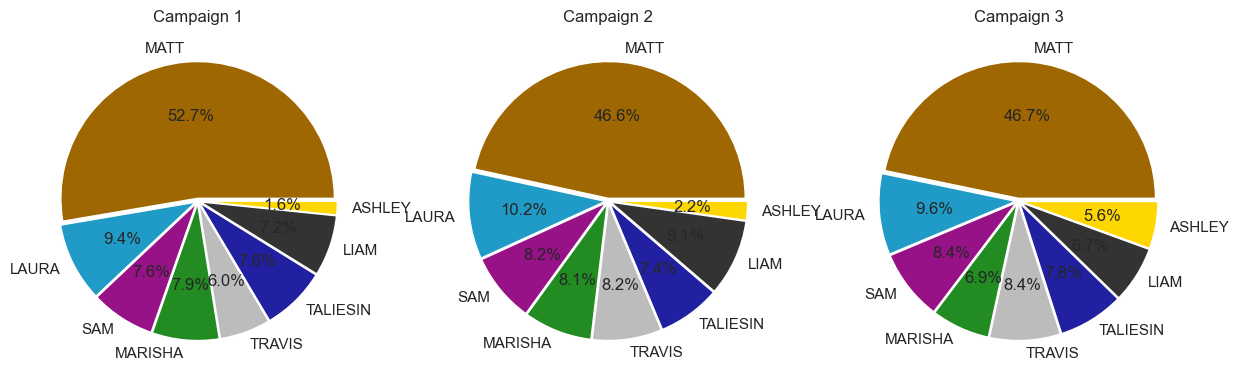

In [387]:
fig, axes = plt.subplots(1, 3, figsize = (15, 30))

for i in [1, 2, 3]:
    c_summary = campaign_lines_summary[campaign_lines_summary['campaign_no'] == i]
    axes[i - 1].pie(
        c_summary['nwords'],
        labels  = c_summary['speaker'],
        autopct = '%1.1f%%',
        colors  = [cast[x]['color'] for x in c_summary['speaker']],
        explode = [0.02] * len(cast)
    )
    axes[i - 1].set_title(f'Campaign {i}')

plt.show()

Here we can see that Matt speaks less in campaigns 2 and 3 than he did in campaign 1, likely due to his experience and being the DM, while the others became more comfortable contributing as time went along. Ashley sees a drastic increase in campaign 3 mainly due to being in all the episodes and not away for other jobs.

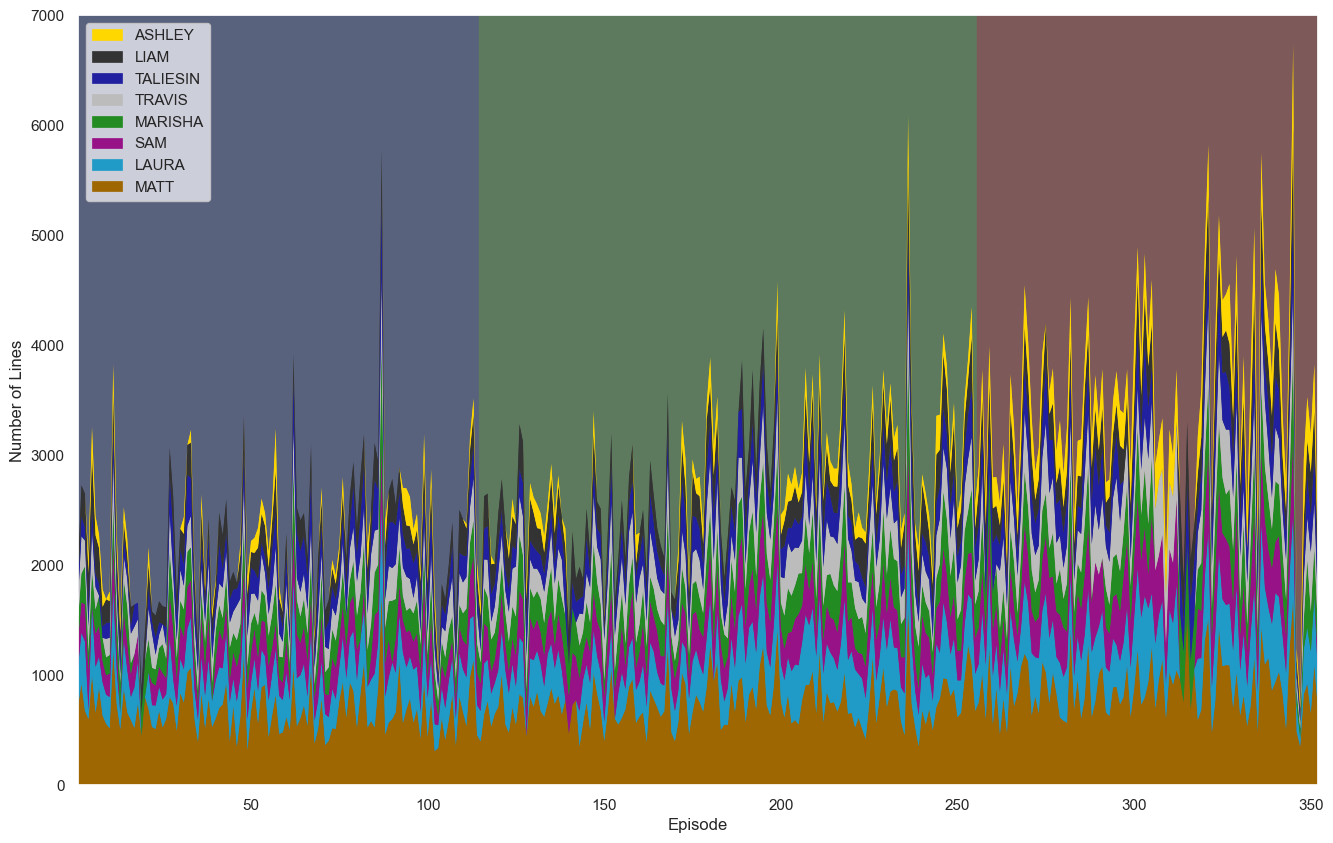

In [406]:
xmin = episode_summary['episode_index'].min()
xmax = episode_summary['episode_index'].max()
ymax = math.ceil(per_episode_summary['lines'].max() / 1000) * 1000
p = so.Plot(
    data  = episode_summary,
    x     = 'episode_index',
    y     = 'lines',
    color = 'speaker'
) \
    .add(so.Area(alpha = 1), so.Stack()) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Number of Lines') \
    .scale(color = [x['color'] for x in cast.values()]) \
    .limit(
        x = (xmin, xmax),
        y = (0, ymax)
    )

f, ax = plt.subplots()

for i, row in campaign_bounds.iterrows():
    ax.add_patch(ptch.Rectangle(
        xy     = (row['xmin'], 0),
        width  = row['xmax'] - row['xmin'],
        height = ymax,
        color  = campaign_colors['background'][i]
    ))

p.on(ax).plot()

legend = f.legends.pop(0)
ax.legend(legend.legend_handles, [t.get_text() for t in legend.texts])
sns.move_legend(ax, "upper left", reverse = True)

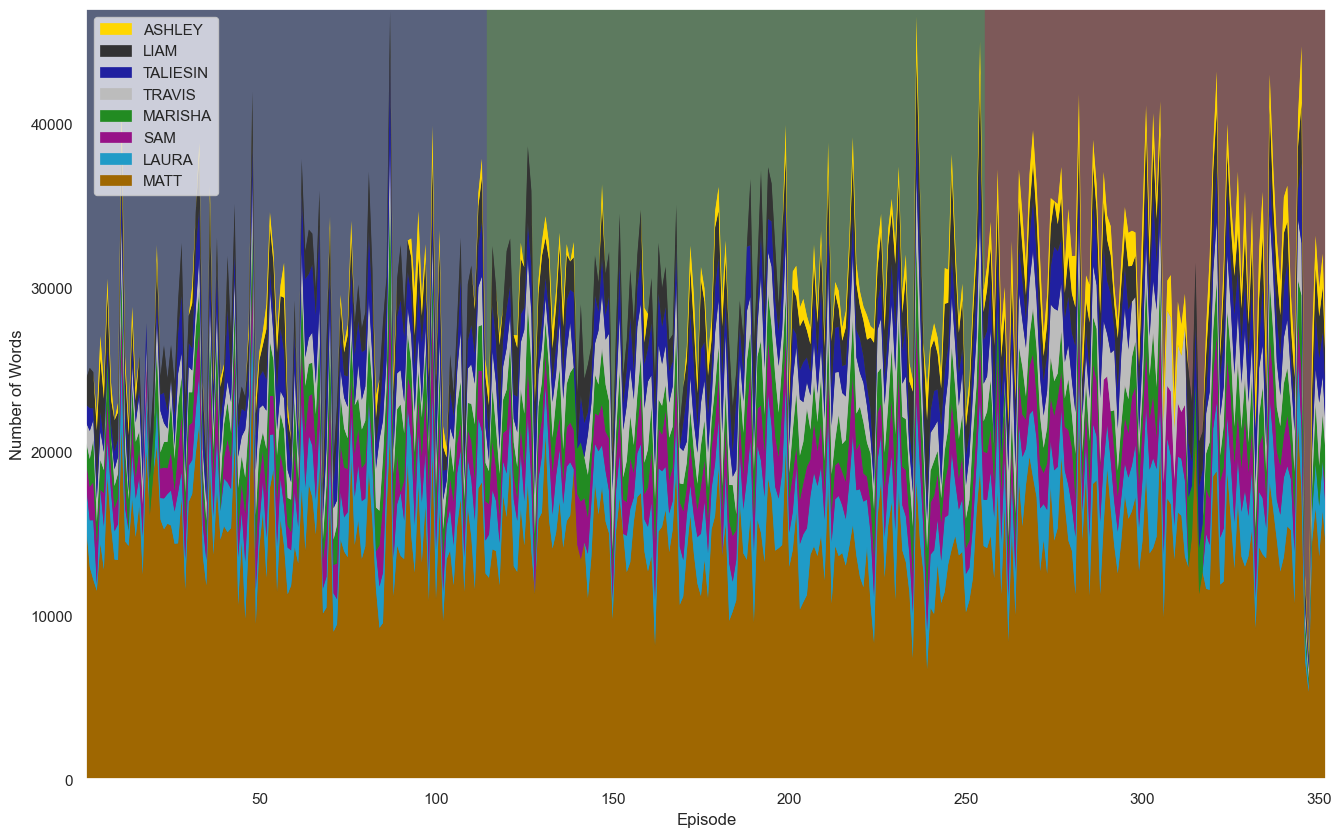

In [407]:
ymax = math.ceil(per_episode_summary['nwords'].max() / 1000) * 1000
p = so.Plot(
    data  = episode_summary,
    x     = 'episode_index',
    y     = 'nwords',
    color = 'speaker'
) \
    .add(so.Area(alpha = 1), so.Stack()) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Number of Words') \
    .scale(color = [x['color'] for x in cast.values()]) \
    .limit(
        x = (xmin, xmax),
        y = (0, ymax)
    )

f, ax = plt.subplots()

for i, row in campaign_bounds.iterrows():
    ax.add_patch(ptch.Rectangle(
        xy     = (row['xmin'], 0),
        width  = row['xmax'] - row['xmin'],
        height = ymax,
        color  = campaign_colors['background'][i]
    ))

p.on(ax).plot()

legend = f.legends.pop(0)
ax.legend(legend.legend_handles, [t.get_text() for t in legend.texts])
sns.move_legend(ax, "upper left", reverse = True)

These are very noisy and hard to read. Let's normalize by total number of words (words seems to be more consistent and meaningful for right now).

In [448]:
episode_summary['nwords_proportion'] = episode_summary.groupby(['episode_index'], group_keys = False)['nwords'] \
    .apply(lambda x: x / x.sum())
episode_summary

,episode_index,speaker,campaign_no,arc_no,episode_no,lines,linelength,nwords,episode_label,nwords_proportion
0,1.0,MATT,1,1,1,709,116.506347,15325,1-1-1,0.626277
1,1.0,LAURA,1,1,1,347,37.106628,2531,1-1-1,0.103433
2,1.0,SAM,1,1,1,240,32.162500,1492,1-1-1,0.060973
3,1.0,MARISHA,1,1,1,180,34.122222,1208,1-1-1,0.049367
4,1.0,TRAVIS,1,1,1,189,31.899471,1199,1-1-1,0.048999
...,...,...,...,...,...,...,...,...,...,...
2811,352.0,MARISHA,3,4,23,216,46.087963,1879,3-4-23,0.074682
2812,352.0,TRAVIS,3,4,23,214,34.434579,1391,3-4-23,0.055286
2813,352.0,TALIESIN,3,4,23,255,41.027451,2054,3-4-23,0.081638
2814,352.0,LIAM,3,4,23,164,45.420732,1415,3-4-23,0.056240


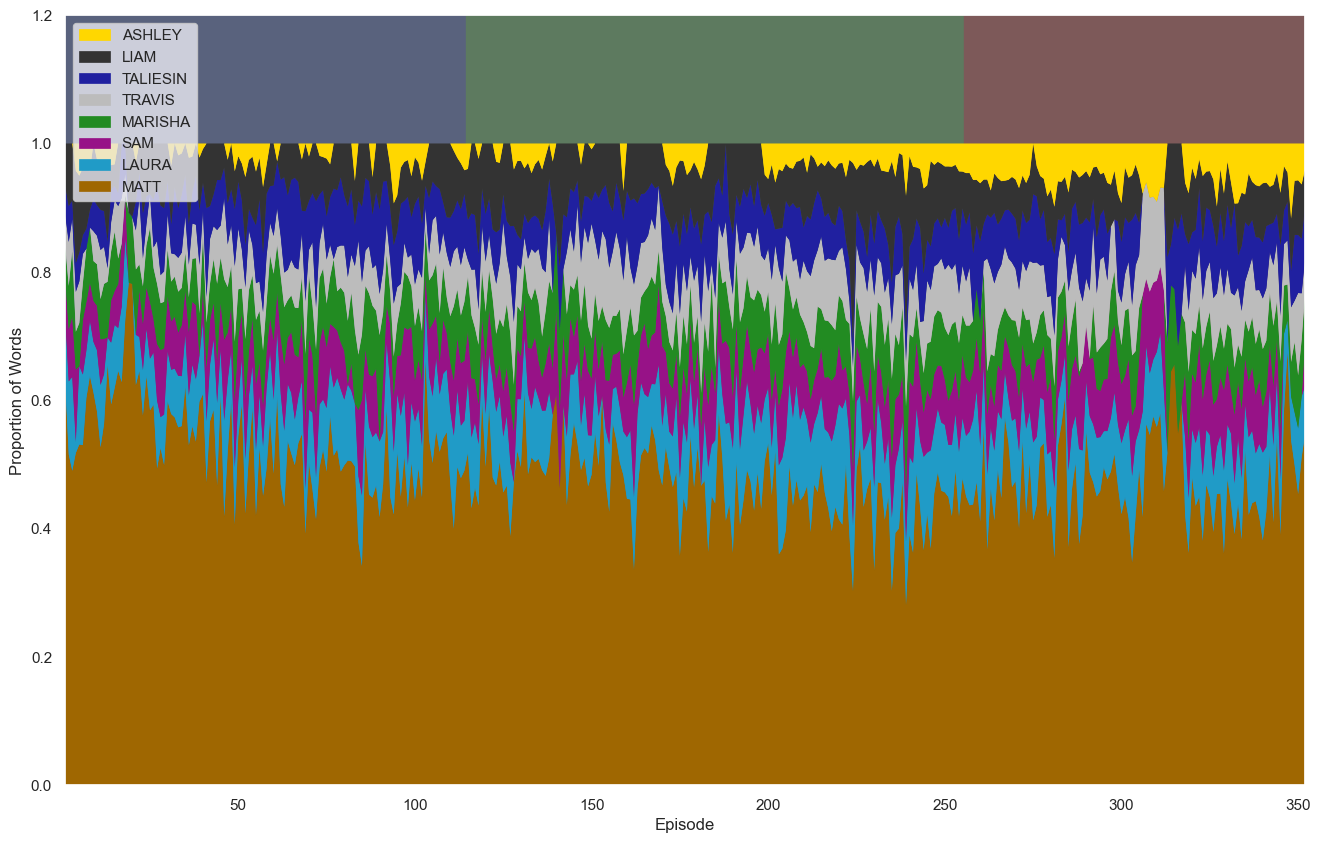

In [440]:
ymax = 1.2
p = so.Plot(
    data  = episode_summary,
    x     = 'episode_index',
    y     = 'nwords_proportion',
    color = 'speaker'
) \
    .add(so.Area(alpha = 1), so.Stack()) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Proportion of Words') \
    .scale(color = [x['color'] for x in cast.values()]) \
    .limit(
        x = (xmin, xmax),
        y = (0, ymax)
    )

f, ax = plt.subplots()

for i, row in campaign_bounds.iterrows():
    ax.add_patch(ptch.Rectangle(
        xy     = (row['xmin'], 0),
        width  = row['xmax'] - row['xmin'],
        height = ymax,
        color  = campaign_colors['background'][i]
    ))

p.on(ax).plot()

legend = f.legends.pop(0)
ax.legend(legend.legend_handles, [t.get_text() for t in legend.texts])
sns.move_legend(ax, "upper left", reverse = True)

Cleaner, but let's try various amounts of smoothing (average over a window).

In [460]:
def speaker_rolling_prop(n):
    return episode_summary.groupby(['speaker'], group_keys = False)['nwords_proportion'] \
        .apply(lambda x: x.rolling(n, min_periods = 1).mean())
episode_summary['nwords_proportion_rolling_5'] = speaker_rolling_prop(5)
episode_summary['nwords_proportion_rolling_10'] = speaker_rolling_prop(10)
episode_summary

,episode_index,speaker,campaign_no,arc_no,episode_no,lines,linelength,nwords,episode_label,nwords_proportion,nwords_proportion_rolling_5,nwords_proportion_rolling_10
0,1.0,MATT,1,1,1,709,116.506347,15325,1-1-1,0.626277,0.626277,0.626277
1,1.0,LAURA,1,1,1,347,37.106628,2531,1-1-1,0.103433,0.103433,0.103433
2,1.0,SAM,1,1,1,240,32.162500,1492,1-1-1,0.060973,0.060973,0.060973
3,1.0,MARISHA,1,1,1,180,34.122222,1208,1-1-1,0.049367,0.049367,0.049367
4,1.0,TRAVIS,1,1,1,189,31.899471,1199,1-1-1,0.048999,0.048999,0.048999
...,...,...,...,...,...,...,...,...,...,...,...,...
2811,352.0,MARISHA,3,4,23,216,46.087963,1879,3-4-23,0.074682,0.081425,0.079270
2812,352.0,TRAVIS,3,4,23,214,34.434579,1391,3-4-23,0.055286,0.081307,0.079840
2813,352.0,TALIESIN,3,4,23,255,41.027451,2054,3-4-23,0.081638,0.083375,0.075098
2814,352.0,LIAM,3,4,23,164,45.420732,1415,3-4-23,0.056240,0.078253,0.070965


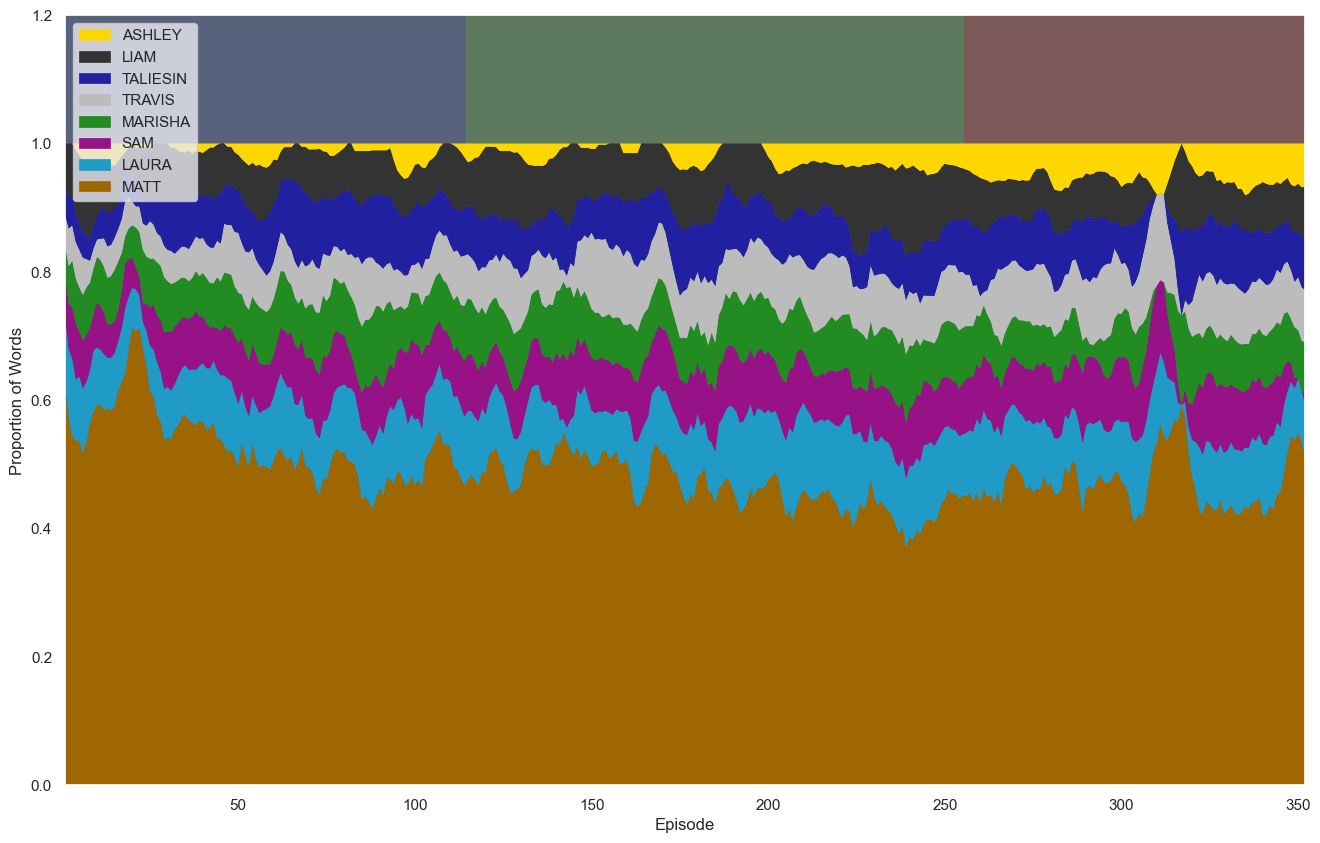

In [458]:
ymax = 1.2
p = so.Plot(
    data  = episode_summary,
    x     = 'episode_index',
    y     = 'nwords_proportion_rolling_5',
    color = 'speaker'
) \
    .add(so.Area(alpha = 1), so.Stack()) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Proportion of Words') \
    .scale(color = [x['color'] for x in cast.values()]) \
    .limit(
        x = (xmin, xmax),
        y = (0, ymax)
    )

f, ax = plt.subplots()

for i, row in campaign_bounds.iterrows():
    ax.add_patch(ptch.Rectangle(
        xy     = (row['xmin'], 0),
        width  = row['xmax'] - row['xmin'],
        height = ymax,
        color  = campaign_colors['background'][i]
    ))

p.on(ax).plot()

legend = f.legends.pop(0)
ax.legend(legend.legend_handles, [t.get_text() for t in legend.texts])
sns.move_legend(ax, "upper left", reverse = True)

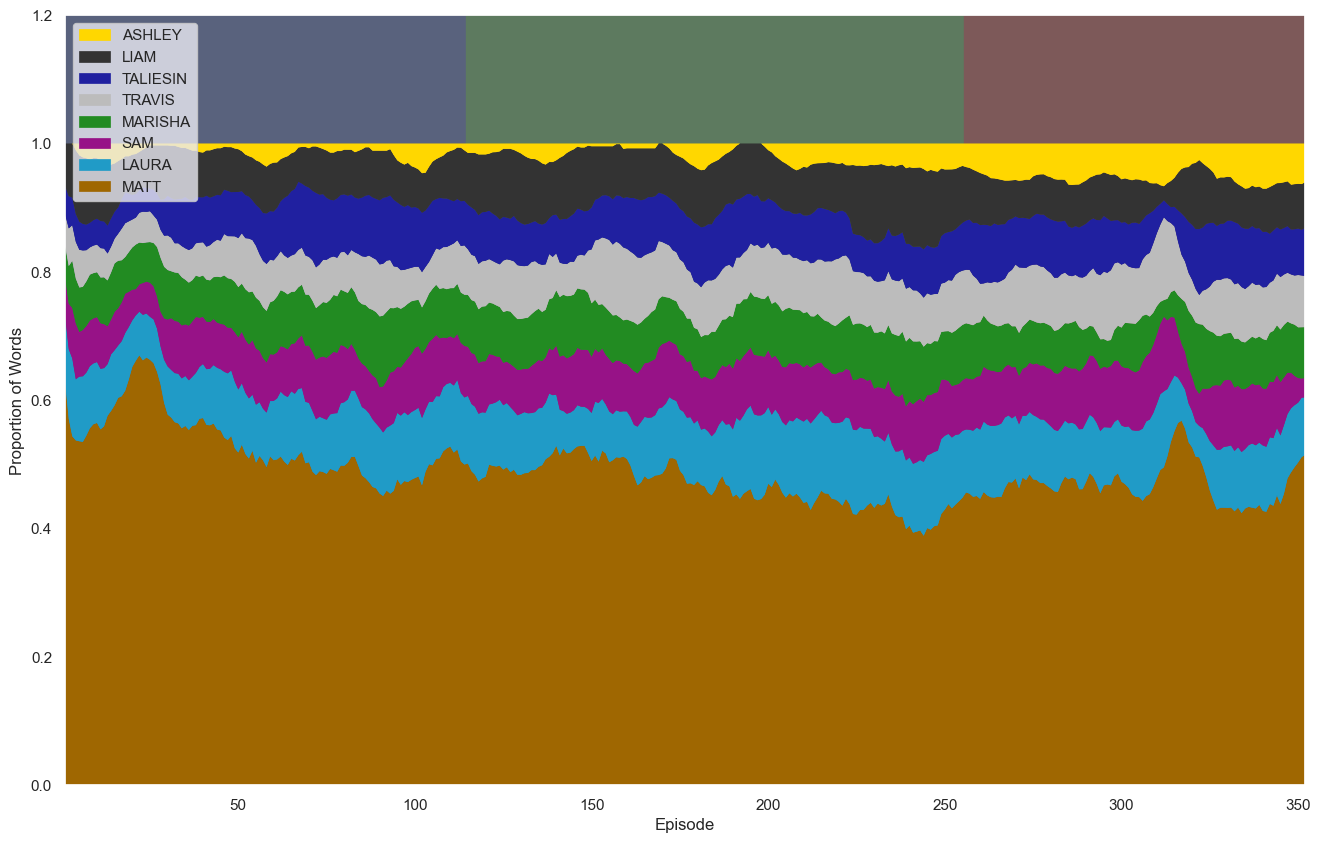

In [459]:
ymax = 1.2
p = so.Plot(
    data  = episode_summary,
    x     = 'episode_index',
    y     = 'nwords_proportion_rolling_10',
    color = 'speaker'
) \
    .add(so.Area(alpha = 1), so.Stack()) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Proportion of Words') \
    .scale(color = [x['color'] for x in cast.values()]) \
    .limit(
        x = (xmin, xmax),
        y = (0, ymax)
    )

f, ax = plt.subplots()

for i, row in campaign_bounds.iterrows():
    ax.add_patch(ptch.Rectangle(
        xy     = (row['xmin'], 0),
        width  = row['xmax'] - row['xmin'],
        height = ymax,
        color  = campaign_colors['background'][i]
    ))

p.on(ax).plot()

legend = f.legends.pop(0)
ax.legend(legend.legend_handles, [t.get_text() for t in legend.texts])
sns.move_legend(ax, "upper left", reverse = True)

Here you can really see Ashley's increase in speaking as time goes on.

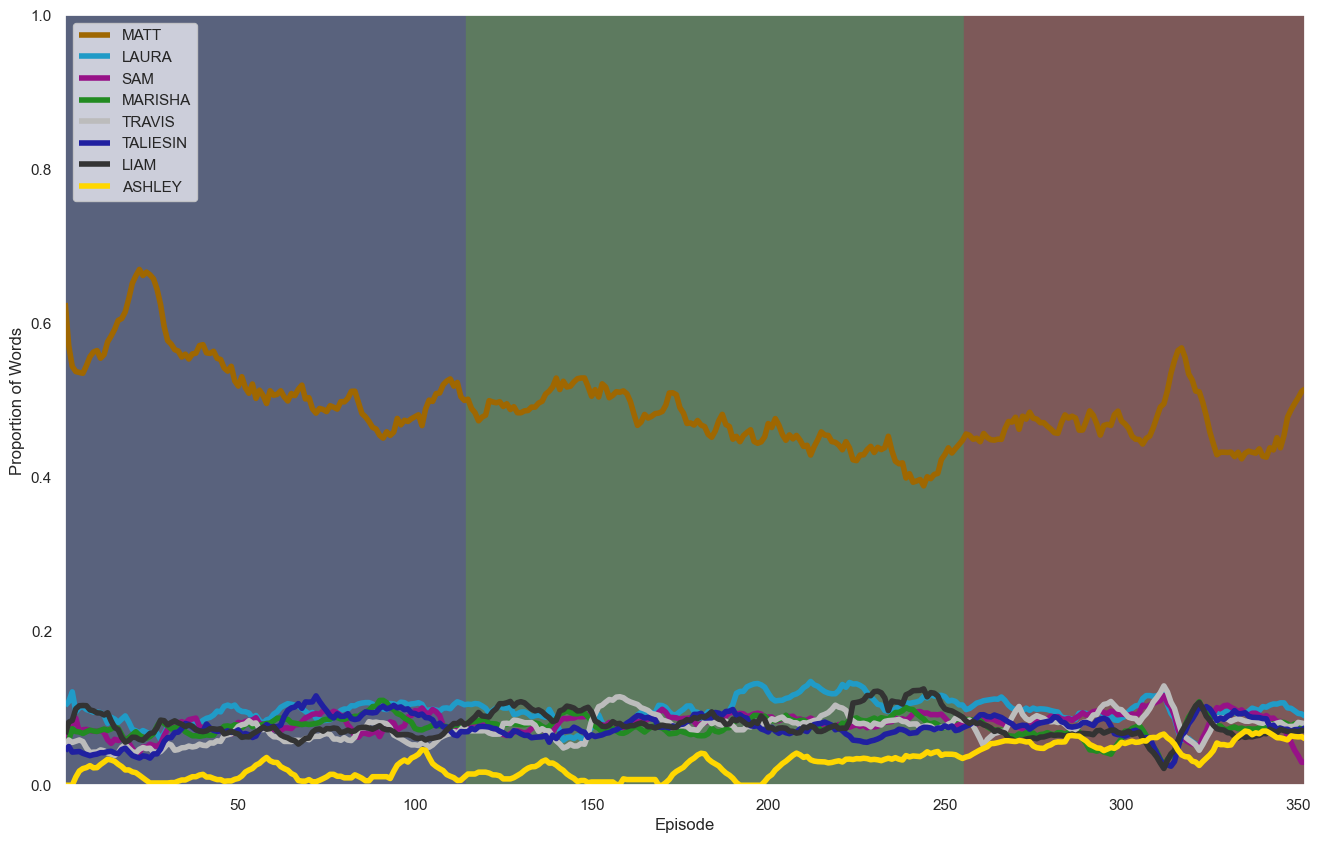

In [474]:
ymax = 1
p = so.Plot(
    data  = episode_summary,
    x     = 'episode_index',
    y     = 'nwords_proportion_rolling_10',
    color = 'speaker'
) \
    .add(so.Line()) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Proportion of Words') \
    .scale(color = [x['color'] for x in cast.values()]) \
    .limit(
        x = (xmin, xmax),
        y = (0, ymax)
    )

f, ax = plt.subplots()

for i, row in campaign_bounds.iterrows():
    ax.add_patch(ptch.Rectangle(
        xy     = (row['xmin'], 0),
        width  = row['xmax'] - row['xmin'],
        height = ymax,
        color  = campaign_colors['background'][i]
    ))

p.on(ax).plot()

legend = f.legends.pop(0)
ax.legend(legend.legend_handles, [t.get_text() for t in legend.texts])
sns.move_legend(ax, "upper left")

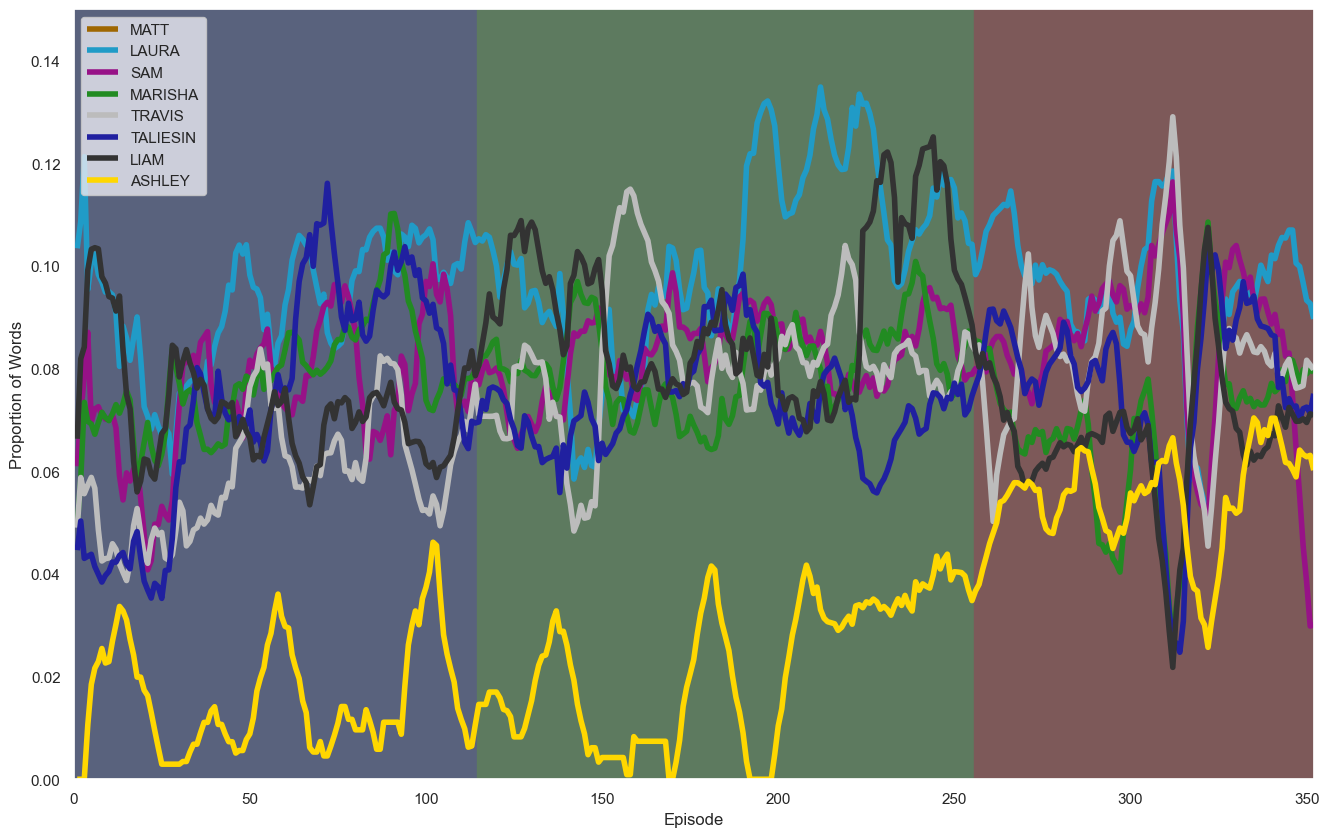

In [477]:
no_matt_cast = cast.copy()
del no_matt_cast['MATT']
no_matt_cast

ymax = 0.15
p = so.Plot(
    data  = episode_summary[episode_summary['speaker'] != 'MATT'],
    x     = 'episode_index',
    y     = 'nwords_proportion_rolling_10',
    color = 'speaker'
) \
    .add(so.Line()) \
    .theme(style.library["fivethirtyeight"]) \
    .label(x = 'Episode', y = 'Proportion of Words') \
    .scale(color = [x['color'] for x in cast.values()]) \
    .limit(
        x = (0, xmax),
        y = (0, ymax)
    )

f, ax = plt.subplots()

for i, row in campaign_bounds.iterrows():
    ax.add_patch(ptch.Rectangle(
        xy     = (row['xmin'], 0),
        width  = row['xmax'] - row['xmin'],
        height = ymax,
        color  = campaign_colors['background'][i]
    ))

p.on(ax).plot()

legend = f.legends.pop(0)
ax.legend(legend.legend_handles, [t.get_text() for t in legend.texts])
sns.move_legend(ax, "upper left")